<a href="https://colab.research.google.com/github/lukilearn/CAPSTONE_3_Cardiovascular_Risk_Prediction_ML_Classification/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

##### **Project Type**    - CLASSIFICATION
##### **Contribution**    - Individual
##### **Name -** G MOHAMED LUQMAN



# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset from github repository
url = 'https://raw.githubusercontent.com/lukilearn/CAPSTONE_3_Cardiovascular_Risk_Prediction_ML_Classification/main/data_cardiovascular_risk.csv'
df = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look

# View top 5 rows of the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# View last 5 rows of the dataset

df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  3390
Number of columns are:  17


### Dataset Information

In [ ]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values, Missing Values/Null Values, Unique value

In [ ]:
# Dataset Duplicate Value Count
# This user define function will give the type,count of null and non null values as well as null ratio

def df_info():
  temp=pd.DataFrame(index=df.columns)
  temp["datatype"]=df.dtypes
  temp["not null values"]=df.count()
  temp["null value"]=df.isnull().sum()
  temp["% of null value"]=df.isnull().mean()*100
  temp["unique count"]=df.nunique() # Return Series with number of distinct elements. Can ignore NaN values.
  return temp
df_info()

,datatype,not null values,null value,% of null value,unique count
id,int64,3390,0,0.000000,3390
age,int64,3390,0,0.000000,39
education,float64,3303,87,2.566372,4
sex,object,3390,0,0.000000,2
is_smoking,object,3390,0,0.000000,2
cigsPerDay,float64,3368,22,0.648968,32
BPMeds,float64,3346,44,1.297935,2
prevalentStroke,int64,3390,0,0.000000,2
prevalentHyp,int64,3390,0,0.000000,2
diabetes,int64,3390,0,0.000000,2


#### Missing Values/Null Values

<Axes: >

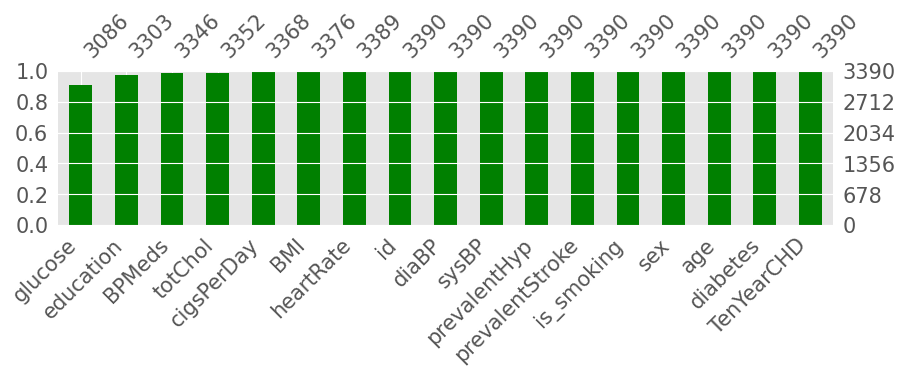

In [ ]:
# Missing Values/Null Values Count

import missingno as msno
msno.bar(df, color='green',sort='ascending', figsize=(10,2), fontsize=15)


### What did you know about your dataset?


We get to know the following points about our dataset:

1.  The dataset contains 3390 rows and 17 columns.

2.  The dataset don't have any duplicated observations.
    'sex' and 'is_smoking' feature is of object dype and rest others are numeric in nature.

3.   The null values present in 'glucose', 'education', 'BPMeds', 'totChol', cigsPerDay' and 'BMI' features with the percentage of 8.96%, 2.56%, 1.29%, 1.12%, 0.64%, 0.41% respectively




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

print(f'Features: {df.columns.to_list()}')

Features: ['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:

#Looking for the description of the dataset to get insights of the data
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

- **ID -** Ids are just randon number given to the randon people who participated in this survey.
- **Age -** Age column represents the age of the particpants.
- **SEX -** This columns defines the gender of the participants.
- **IS_SMOKING -** This attribute refers weather a person smokes or not.
- **CIGSPERDAY -** Cigs per day explains that how many cigarettes are being consumed by an individual.
- **BPMeds -** BPMeds explains weather a person taking Bood-Pressure Medicines or not.
- **prevalentStroke -** Prevalent Stroke means if the patient has the history of stroke.
- **prevalentHyp -** If the patient has a history of hypertension.
- **DIABETES -** Patient has Diabetes or not.
- **totChol -** Cholesterol Mesurement.
- **sysBP-** High BP measurement.
- **diaBP-** Low BP measurement.
- **BMI-** Body mass index.
- **heartRate-** heart rate measurement.
- **glucose-** Glucose density present in blood.
- **TenYearCHD-** Heart related disease in upcoming 10 years.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'id' : 3390
'age' : 39
'education' : 4
'sex' : 2
'is_smoking' : 2
'cigsPerDay' : 32
'BPMeds' : 2
'prevalentStroke' : 2
'prevalentHyp' : 2
'diabetes' : 2
'totChol' : 240
'sysBP' : 226
'diaBP' : 142
'BMI' : 1259
'heartRate' : 68
'glucose' : 132
'TenYearCHD' : 2


## 3. ***Data Wrangling***

In order to impute the null values with the various statistical values (Mean, Median, Mode) we checked following things:
1. Distribution of data
2. Outliers in the data

In [ ]:
# Dropping the first id column
df.drop(['id'] , axis = 1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
# storing the features that contains null values in a separate list
null_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

<Axes: >

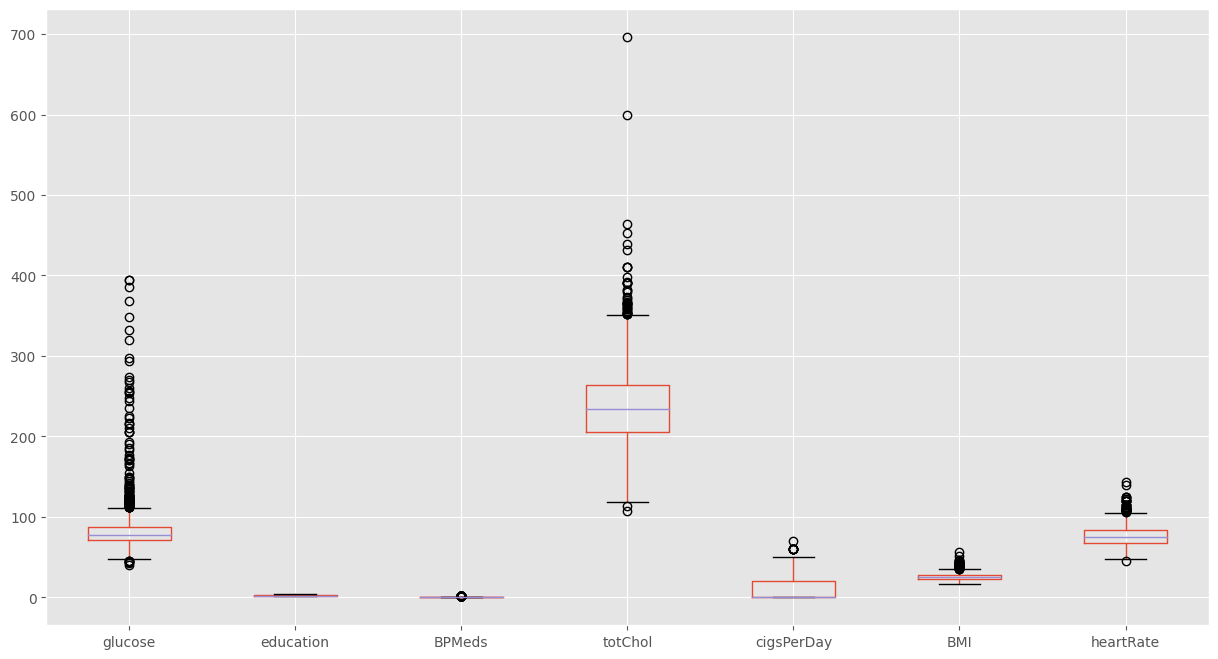

In [ ]:
# Plotting the box plot and observe the outliers in the columns having null values
plt.figure(figsize=(15,8))
df[null_list].boxplot()

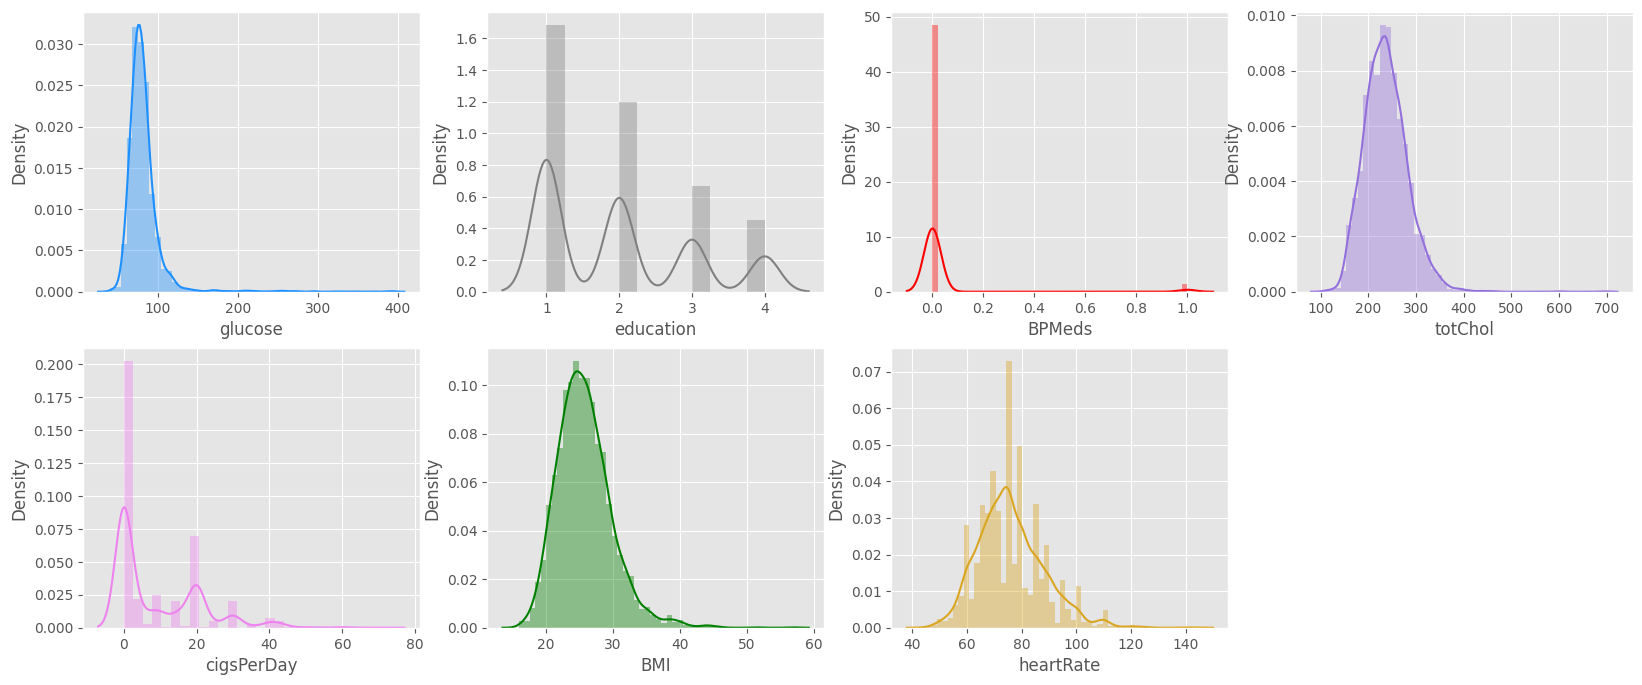

In [ ]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['dodgerblue','grey','red','mediumpurple','violet','green','goldenrod','lime']
for i,j in zip(null_list, colour):
  ax= plt.subplot(2,4,null_list.index(i)+1)
  sns.distplot(df[i],color=j)
plt.show()

We know that:
1. Mean is used when we have normal distributed data and do not contain any outlier.
2. Median is used  when the data is numerical, continous and contains extreme values (outliers).
3. Mode is used when the data is categorical in nature.

By checking the outliers and distribution of the data we are going to impute the null values of:
1. "glucose" -> Median
2. "education" -> Mode
3. "BPMeds" -> Mode
4. "totChol" -> Median
5. "cigsPerDay" -> Mean
6. "BMI" -> Median
7. "heartRate" -> Median

In [ ]:
# Filling up the NaN values of each feature
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [ ]:
# Rechecking the null values in the dataset after imputing with different statistical values
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?

1. We have replaced null values from glucose, totChol,BMI and heartRate with median as they are containing high amount of outliers.
2. Null values from categorical features like Education and BPmeds are replaced with mode.
3. As CigsPerDay feature is having median value as zero and contains less number of outliers We have replaced null values within it with mean.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Separating the categorical and continous variable and storing them into different lists (excluding 'id')
categorical_variable=[]
continous_variable=[]

for i in df.columns:
  if i == 'id':
    pass
  elif df[i].nunique() <10:
    categorical_variable.append(i)
  elif df[i].nunique() >= 10:
    continous_variable.append(i)

In [ ]:
# Checking the definded lists
print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Univariate Analysis

#### Chart - 1 (Histogram of all variable)

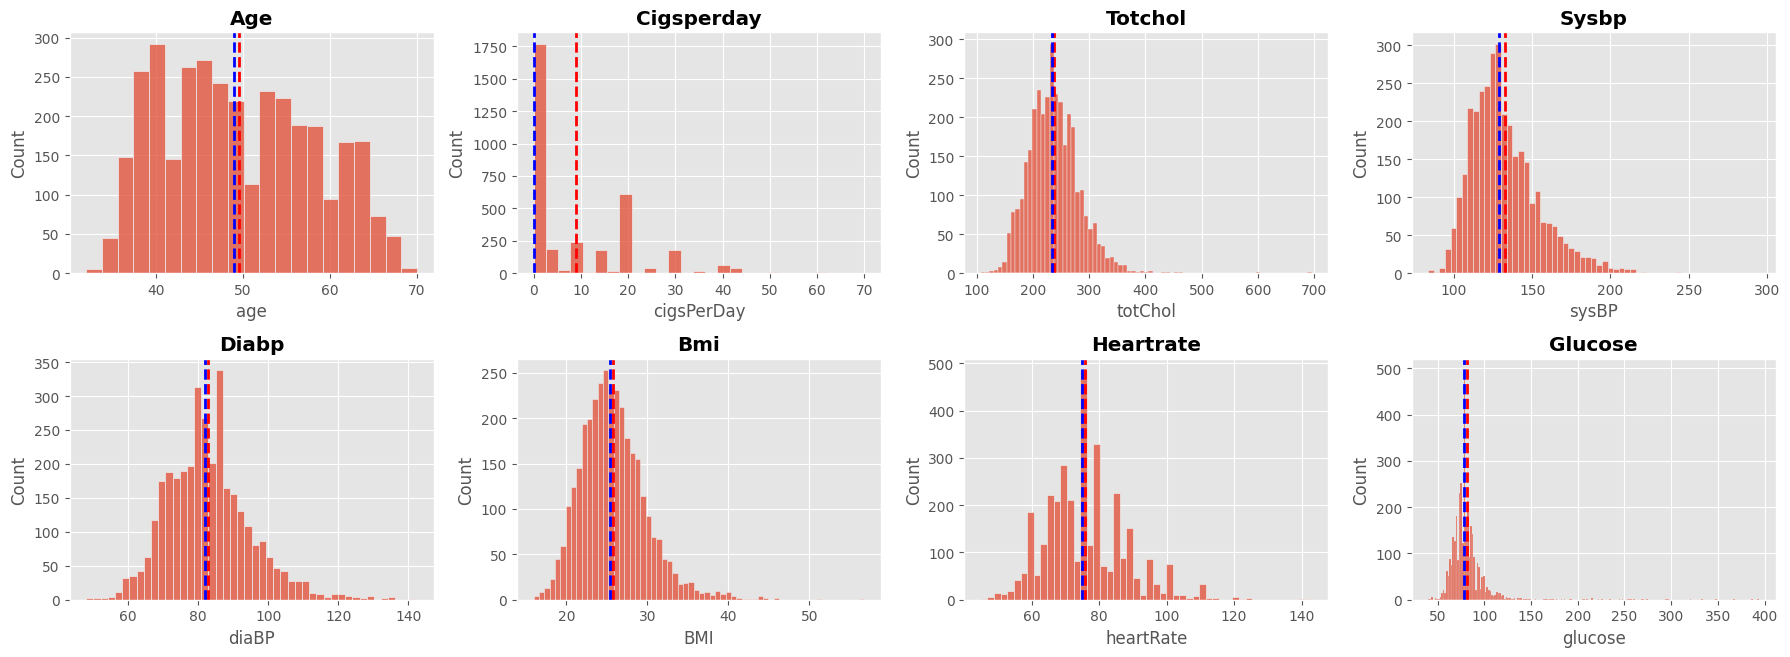

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(continous_variable):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()### Univariate Analysis

##### 1. Why did you pick the specific chart?

Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :-

*    the majority of the individuals in the dataset are between 40-60 years old, with a few individuals who are younger than 30 or older than 70.
*   the histogram could show that the majority of the individuals in the dataset smoke less than 10 cigarettes per day, with a few individuals smoking more than 20 cigarettes per day.

*    the majority of the individuals in the dataset have total cholesterol levels between 200-250 mg/dL, with a few individuals having total cholesterol levels below 160 mg/dL or above 300 mg/dL.
*    the majority of the individuals in the dataset have systolic blood pressure levels between 120-140 mmHg, with a few individuals having systolic blood pressure levels below 90 mmHg or above 160 mmHg.

*   the majority of the individuals in the dataset have diastolic blood pressure levels between 80-90 mmHg, with a few individuals having diastolic blood pressure levels below 60 mmHg or above 100 mmHg.
*   the majority of the individuals in the dataset have a body mass index between 24-26, with a few individuals having a body mass index below 18 or above 35.

*   the majority of the individuals in the dataset have a heart rate between 60-90 beats per minute, with a few individuals having a heart rate below 50 beats per minute or above 100 beats per minute.
*   the majority of the individuals in the dataset have a blood glucose level between 70-90 mg/dL, with a few individuals having a blood glucose level below 60 mg/dL or above 130 mg/dL.



#### Chart - 2 (Distribution of categorical features)

In [ ]:
# visualization code
plt.figure(figsize=(20,15))
labels = '0','1'
colors = ['Red', 'yellow']
explode = [0, 0.2]
for i,j in enumerate(categorical_variable[1:]):
  plt.subplot(4,4,i+1)
  # sns.countplot(df[j])
  plt.pie(df[j].value_counts(),explode=explode,colors=colors, autopct='%1.1f%%', shadow=True)
  plt.legend(labels)
  # plt.legend((round(df[j].value_counts()*100/len(df[j]),2))
  plt.title(j)
plt.show()

##### 1. Why did you pick the specific chart?


As we know pie chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of various categorical features.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :-


*   In the dataset, 56.7% of individuals present are female and rest are male.
*   50.24% of the individual present in the dataset are into smoking.

*   Only 2.9% people are taking BP Medicines.
*   68.5% and 31.5 % people have a history of strokes and hypertension respectively.

*   2.6% people have diabetes.
*   15.1% people have a chance of getting heart diseases in ten years.

#### Chart - 3 (Distribution of Education levels)

In [ ]:
# Setting labels for items in Chart
education = df["education"].value_counts()

# Pie Chart
df["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Education levels')

# Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted donut chart to visualize the distribution of education levels among individuals being evaluated for their risk of cardiovascular disease.This type of chart can help to compare individual categories or dimensions to the larger whole, just like a pie chart, but with a couple of advantages. Donut charts can make it easier for us to compare individual dimensions.

##### 2. What is/are the insight(s) found from the chart?

In this dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .




### Bivariate Analysis

#### Chart - 4 (Repression plot of feature vs TenYearCHD)

In [ ]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
df_copied= df.copy()

In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df_copied = df_copied.replace(encoder)

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(18,18))
for n,column in enumerate(df_copied.columns[:-1] ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df_copied[column], y =df_copied['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We plotted above regression plot to see correlation of various feature with respect to TenYearCHD.Regression plot is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

##### 2. What is/are the insight(s) found from the chart?

Following features have a positive relation with TenYearCHD :-

*   Age
*   Sex

*   CigsPerDay
*   BPMeds

*   prevalentStroke
*   prevalentHYP

*   Diabetes
*   TotChol

*   sysBP
*   diaBP

*   BMI
*   Glucose


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.


#### Chart - 5 (Scatterplot of continous correlated features)

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
sns.scatterplot(data=df, x="sysBP", y="diaBP")

plt.subplot(1,5,2)
sns.scatterplot(data=df, x="BMI", y="diaBP")

plt.subplot(1,5,3)
sns.scatterplot(data=df, x="BMI", y="sysBP")

plt.subplot(1,5,4)
sns.scatterplot(data=df, x="age", y="diaBP")

plt.subplot(1,5,5)
sns.scatterplot(data=df, x="age", y="sysBP")

plt.show()

##### 1. Why did you pick the specific chart?

Above distribution of continous features uses scatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

From above plot we can visualise the relationship between :  

*   sysBP and diaBP
*   BMI and diaBP

*   BMI and sysBP
*   age and diaBP

*   age and sysBP



##### 2. What is/are the insight(s) found from the chart?

We see that the first three have strong positive correlation and the last two have a moderate positive correlation .

#### Chart - 6 (Countplot of categorical features with target variable)

In [ ]:
plt.figure(figsize=(20, 18))

# Assuming 'categorical_variable' is a list of categorical variables
for i, j in enumerate(categorical_variable):
    plt.subplot(4, 4, i + 1)
    plots = sns.countplot(x=j, hue='TenYearCHD', data=df, palette=['mediumturquoise', 'tomato'])
    plt.legend(['No Risk', 'At Risk'])

    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')

plt.show()

##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.With the help of above charts we can conclude if BP problems , prevalent strokes , prevalent hypertentions and diabetes are prone to get affected by Heart Disease.

##### 2. What is/are the insight(s) found from the chart?

From the above count plots , we can clearly see that BP Problems , prevalent strokes , prevalent hypertension and dieabetes does have a great impact on getting Heart Diseases.
1. Residents who are at education Level-1 are having slightly more percentage of getting suffered from CHD as compared to other education levels.
2. Males are more prone to CHD as compared to females.
3. Smokers are having slight more chances of suffering from CHD than non-smokers.
4. Residents who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
5. Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

#### Chart - 7 (which age group is vulnerable to CHD?)

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Using catplot
g = sns.catplot(x='age', y='TenYearCHD', kind='bar', data=df, palette='Blues', aspect=3.5)
g.set_axis_labels('Age', 'CHD Probability')
plt.title("Which Age Group is More Vulnerable to CHD")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

##### 1. Why did you pick the specific chart?

We plotted age-CHD Probability plot to know which age group is more vulnerable to Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

we can see that age column is correlated to cardiovascular risk.
With increasing age, chances of having cardiovascular disease increases.People above 65 years (i.e. old people) are more vulnerable to Heart Diseases.

##### 3. Will the gained insights help creating a positive business impact?

As age factor is quite responsible for cardiovascular risk we can target every individual regardless of there health situations and habits as everyone is going to age. Awareness can be spread which can help all companies and individuals wellbeing.

### Multivariate Analysis

#### Chart - 8 (Relation between Sex and CigsPerDAY with TenYearCHD)

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['sex'],y=df['cigsPerDay'],palette=["lightgreen","lightcoral"],hue=df['TenYearCHD'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

As we know bar chart is useful when you are comparing segments of information, such as to compare different categorical or discrete variables so we have used them to display distribution of smoking column.

##### 2. What is/are the insight(s) found from the chart?



*   There are more males consuming cigarattes as compared to females.
*   Under male category,males who are consuming more cigarettes are at a risk of getting Heart Diseases while in females there are quite equal chances for smoker or non-smoker females to get affected by CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


As we can observe that people are at equal risk regradless of they are smoking or not thus when an healthcare company is promoting any specific health care service be it Insurance, routine checkup plans, or tests, they can spread the awareness in no smoking community as well, which inturn increases the consumer base and give protection to wider population and profits to company.

#### Chart - 9 (Are total cholestrol levels related to CHD and Diabetes)

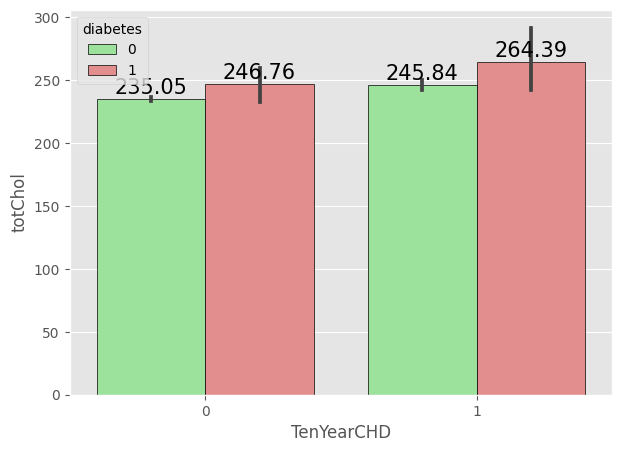

In [ ]:
  plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['totChol'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

TotChol and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.We plotted it to know how the Cholestrol level is related to getting a Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

We can see that there is not much of a difference of cholestrol level for being a sole reason of heart diseases. And diabetic patients are slightly more prone to CHD.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see from above graph that there is slight difference of cholestrol levels looking at CHD patients and normal resident. Still to avoid a risk dignostic or fitness companines can provide medications or respective measures to reduce cholestrol.

#### Chart - 10 (Are glucose level impacted by CHD and Diabetes?)

In [ ]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['glucose'],hue=df['diabetes'],edgecolor='black', palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Glucose-CHD distribution with respect to diabetes uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.By plotting above chart we can get to know if glucose Level leads to heart diseases or not.

##### 2. What is/are the insight(s) found from the chart?


From the above plot, we can infer that higher glucose level lead to heart diseases resulting increased chances of diabetic patients to cardiovascular disease.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For the patients well being, as there are more chances of CHD for residents whose glucose level is high,Treatments and medication of cardio vascular diseases can be coupled with early signs of diabeties, As blood starts getting viscous with increase in concentration of glucose.

#### Chart - 11 (How heartRate is related to CHD considering patients on BP medication?)

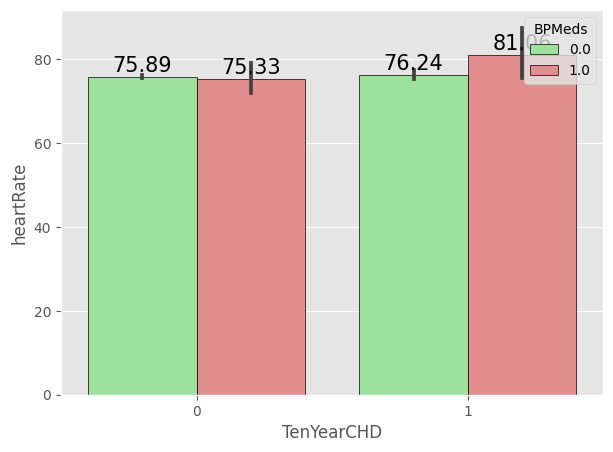

In [36]:
plt.figure(figsize=(7,5))
plots=sns.barplot(x=df['TenYearCHD'],y=df['heartRate'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Heart rate and CHD risk has been displayed by using multiple bar charts. Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space.From above graph we can conclude how heart rate is related to Heart Diseases.

##### 2. What is/are the insight(s) found from the chart?

From the above plot, we can conclude that BP patients taking BP medicines and having higher heart rate are prone to CHD.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As higher heart rate is increasing possibility of heart disease , if awareness is spread it can help various health, nutrition and fitness, insurance and dignostic companines to generate revenue and also help the population to adapt more to better habits & to keep there heart rates in check.

#### Chart - 12 (Are patients with Systolic and Diastolic BP at risk of CHD?)

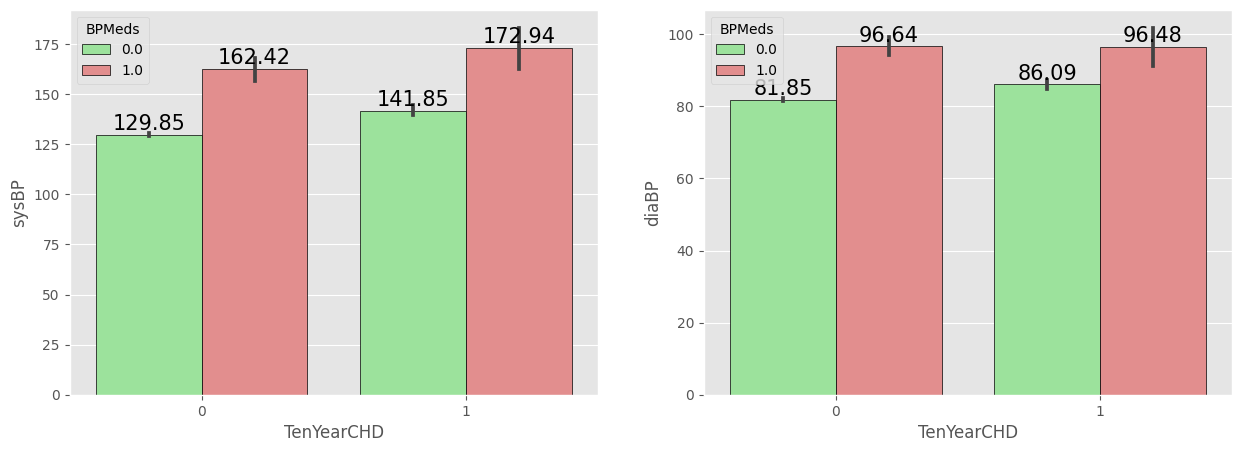

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plots=sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.subplot(1,2,2)
plots=sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],hue=df['BPMeds'],edgecolor='black',palette=["lightgreen","lightcoral"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

SysBP/diaBP-CHD distribution with respect to BPmeds uses a multiple bar chart for data representation.Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.We plotted above graph to know whether patients with systolic and diastolic BP are at a risk of Heart Disease or not.

##### 2. What is/are the insight(s) found from the chart?

We can infer from the graph that, people who are on BP medication are having high sysBP and diaBP.Even these patients are having high chances of getting suffered from CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




Healthcare companies and doctors can target and inspect the patient more throughly who is on BP medication. Which inturn decreases the cost of diagnosis and increases revenue of the company

#### Chart - 13 (Correlation Heatmap)

<Axes: >

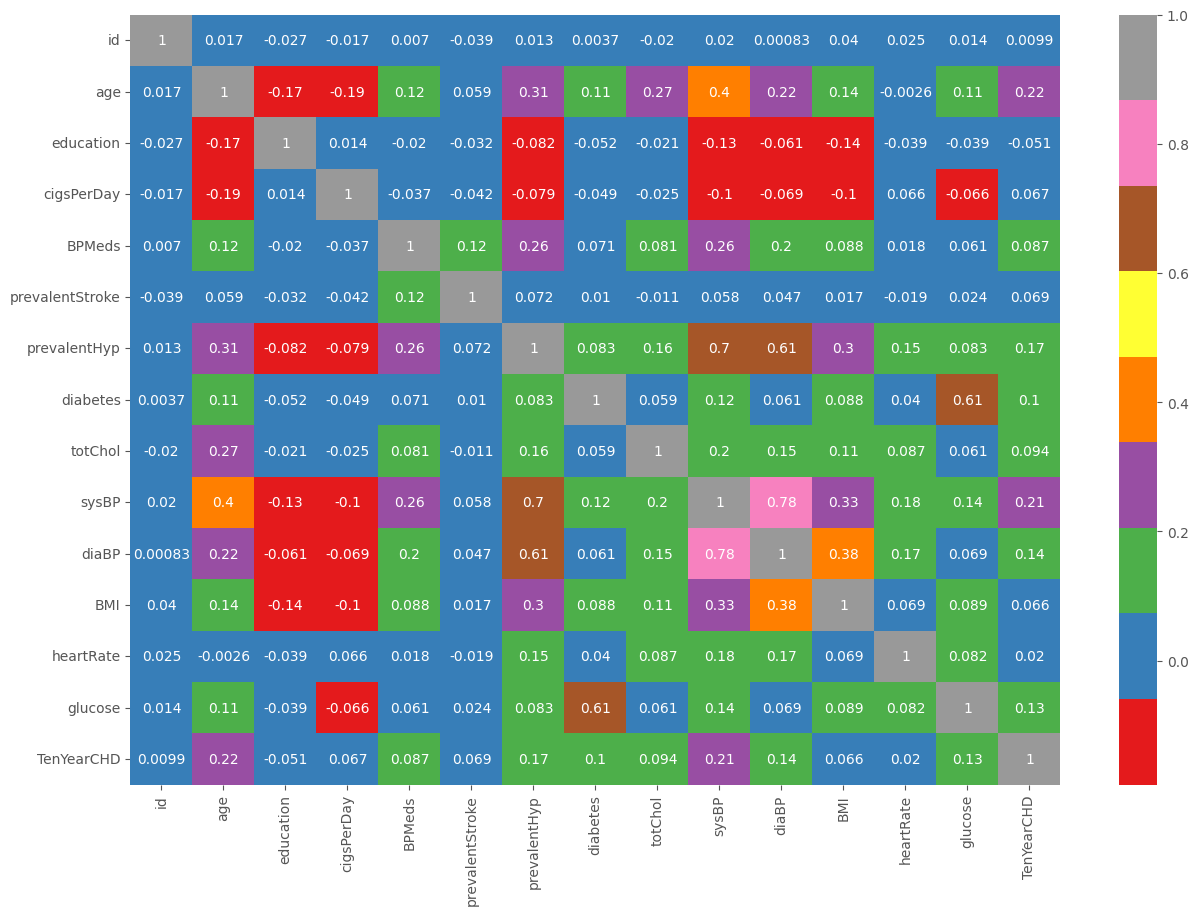

In [39]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("Set1"))

##### 1. Why did you pick the specific chart?

We can see that following have strong correlation :

    diaBP and sysBP

    prevalentHyp and diaBP

    prevalentHyp and sysBP

    diabetes and glucose


Following have weak correlation :  

*   glucose and cigPerDay
*   BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education
*   BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay

#### Chart - 14 - (Pair Plot)

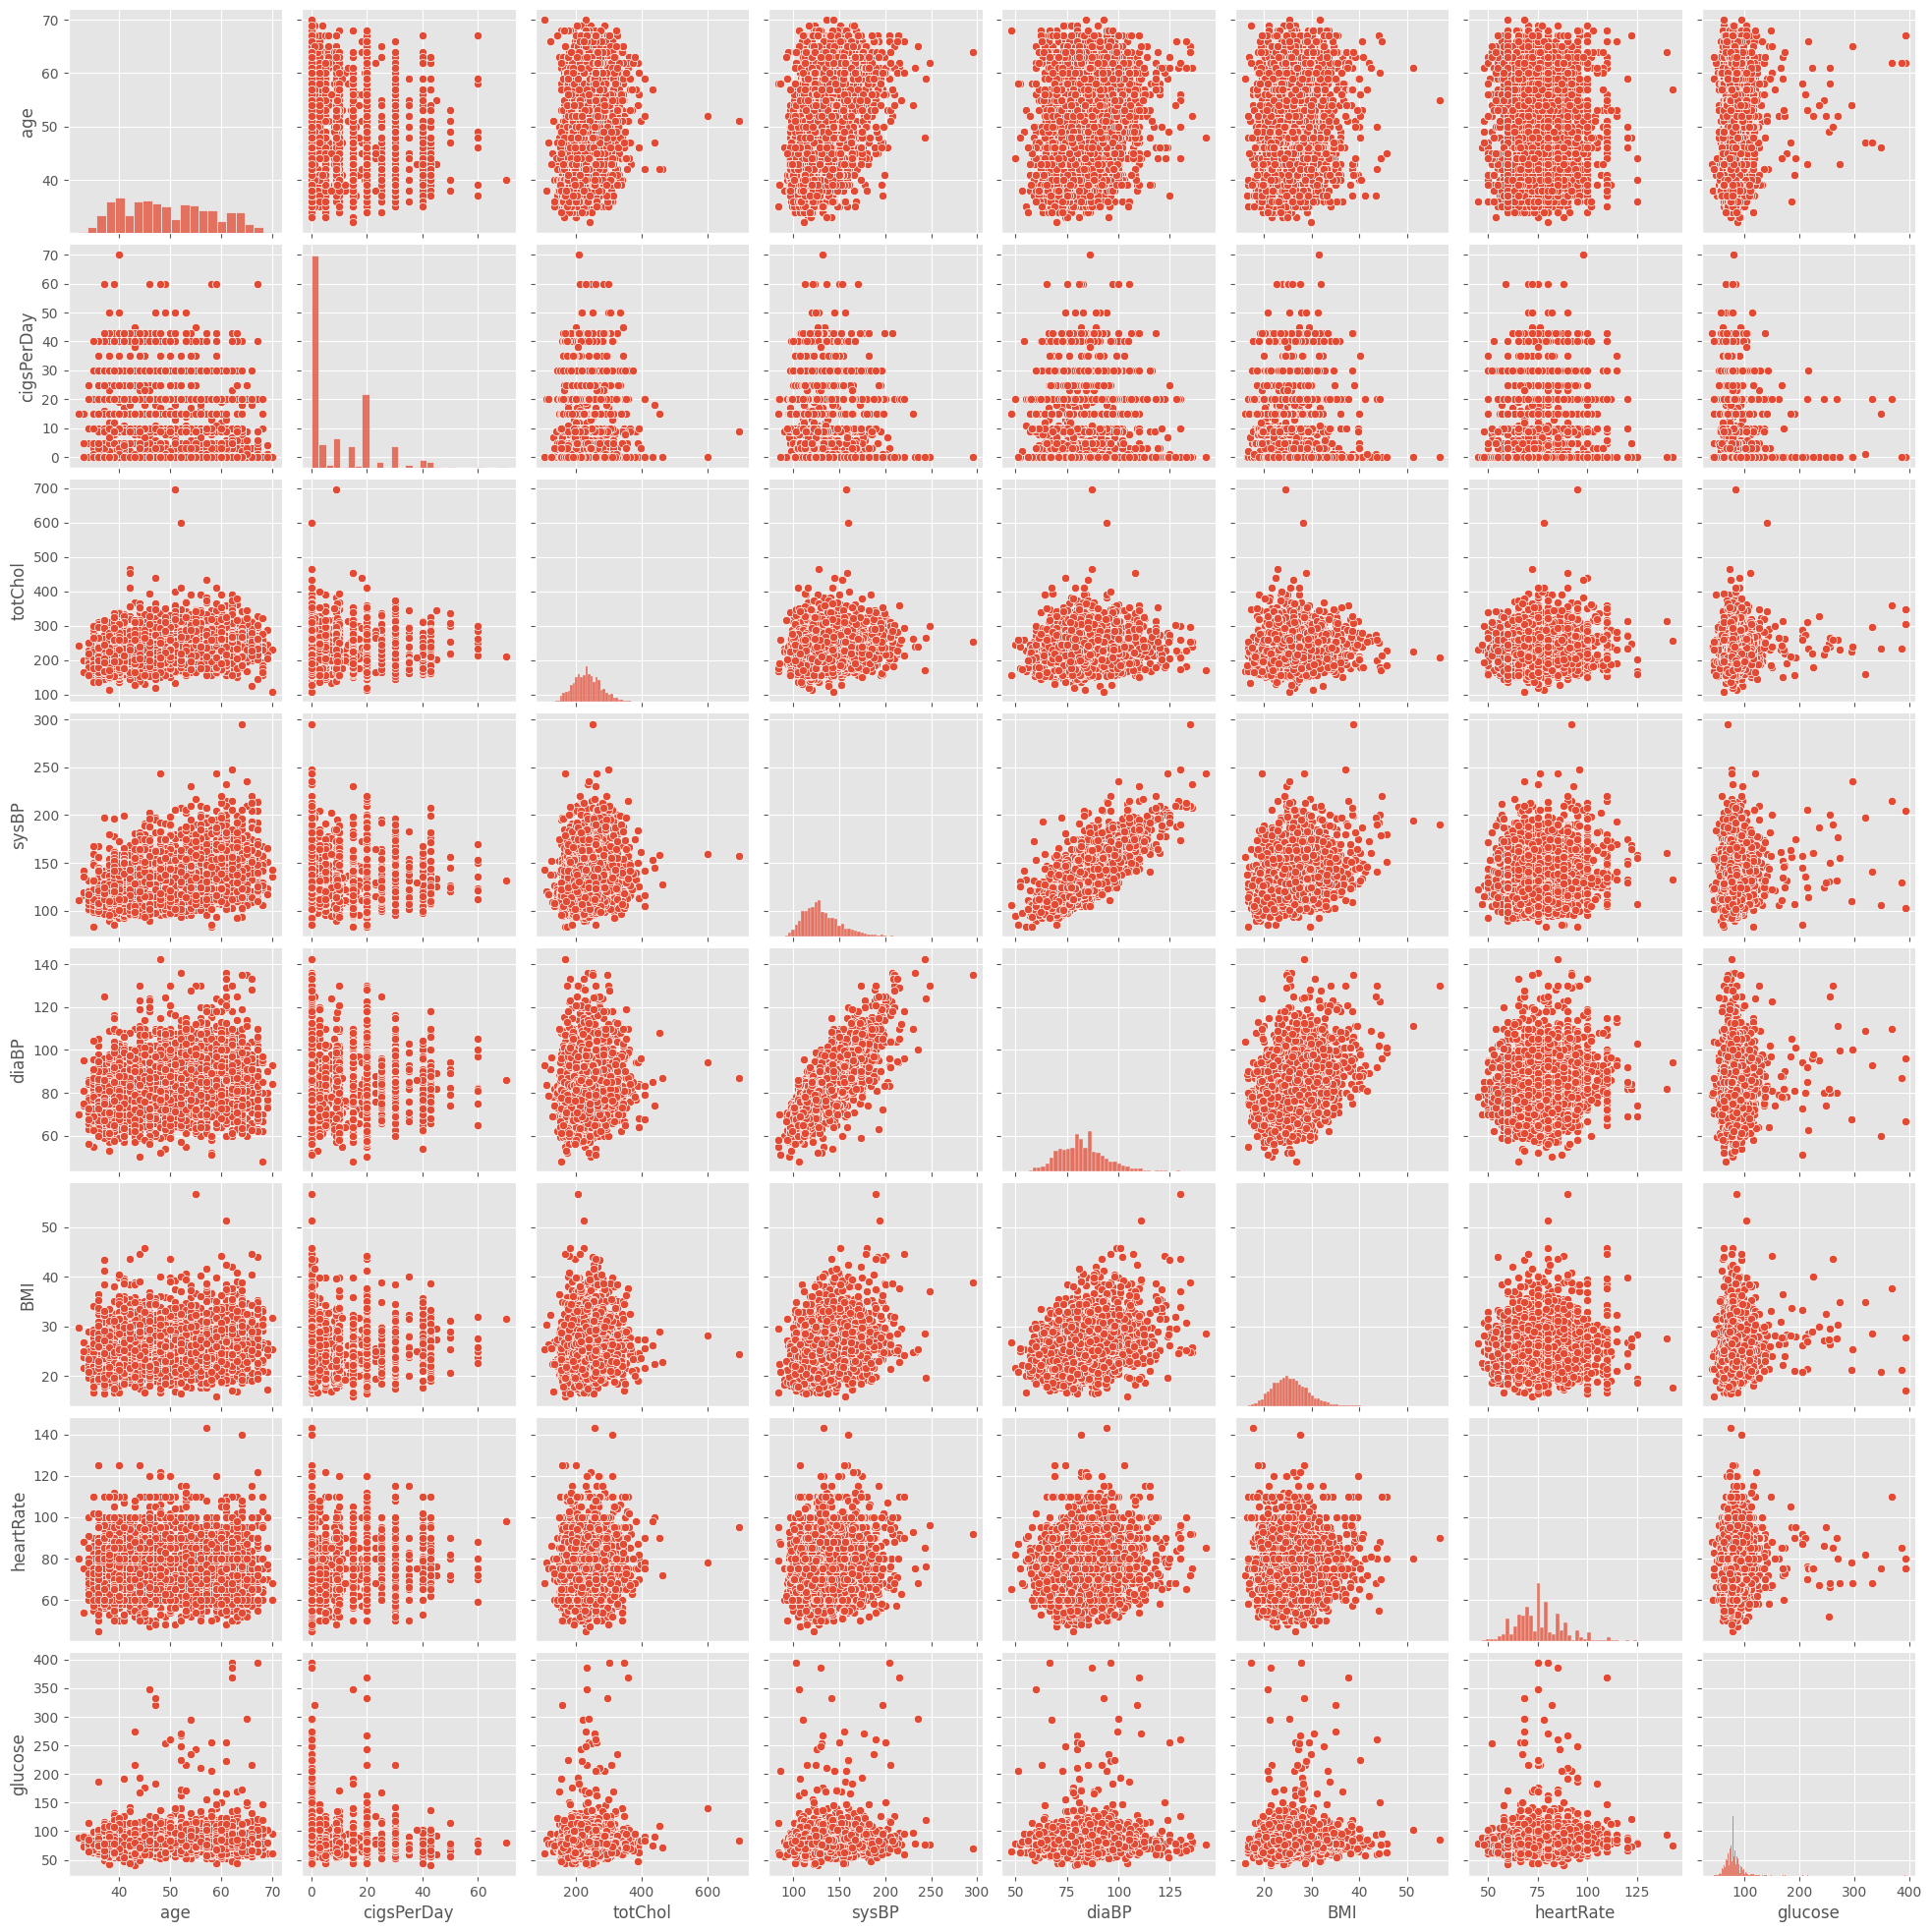

In [40]:
# Pair Plot visualization code
sns.pairplot(df[continous_variable])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can infer that sysBP and diaBP are positively correlated.

## ***5. Hypothesis Testing***

  ### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here

*   Null Hypothesis(H0) - Data set does not have any outliers.
*   Alternative Hypothesis(H1) - Dataset has outliers.


#### 2. Perform an appropriate statistical test.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'age'),
  Text(2, 0, 'education'),
  Text(3, 0, 'cigsPerDay'),
  Text(4, 0, 'BPMeds'),
  Text(5, 0, 'prevalentStroke'),
  Text(6, 0, 'prevalentHyp'),
  Text(7, 0, 'diabetes'),
  Text(8, 0, 'totChol'),
  Text(9, 0, 'sysBP'),
  Text(10, 0, 'diaBP'),
  Text(11, 0, 'BMI'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'glucose'),
  Text(14, 0, 'TenYearCHD')])

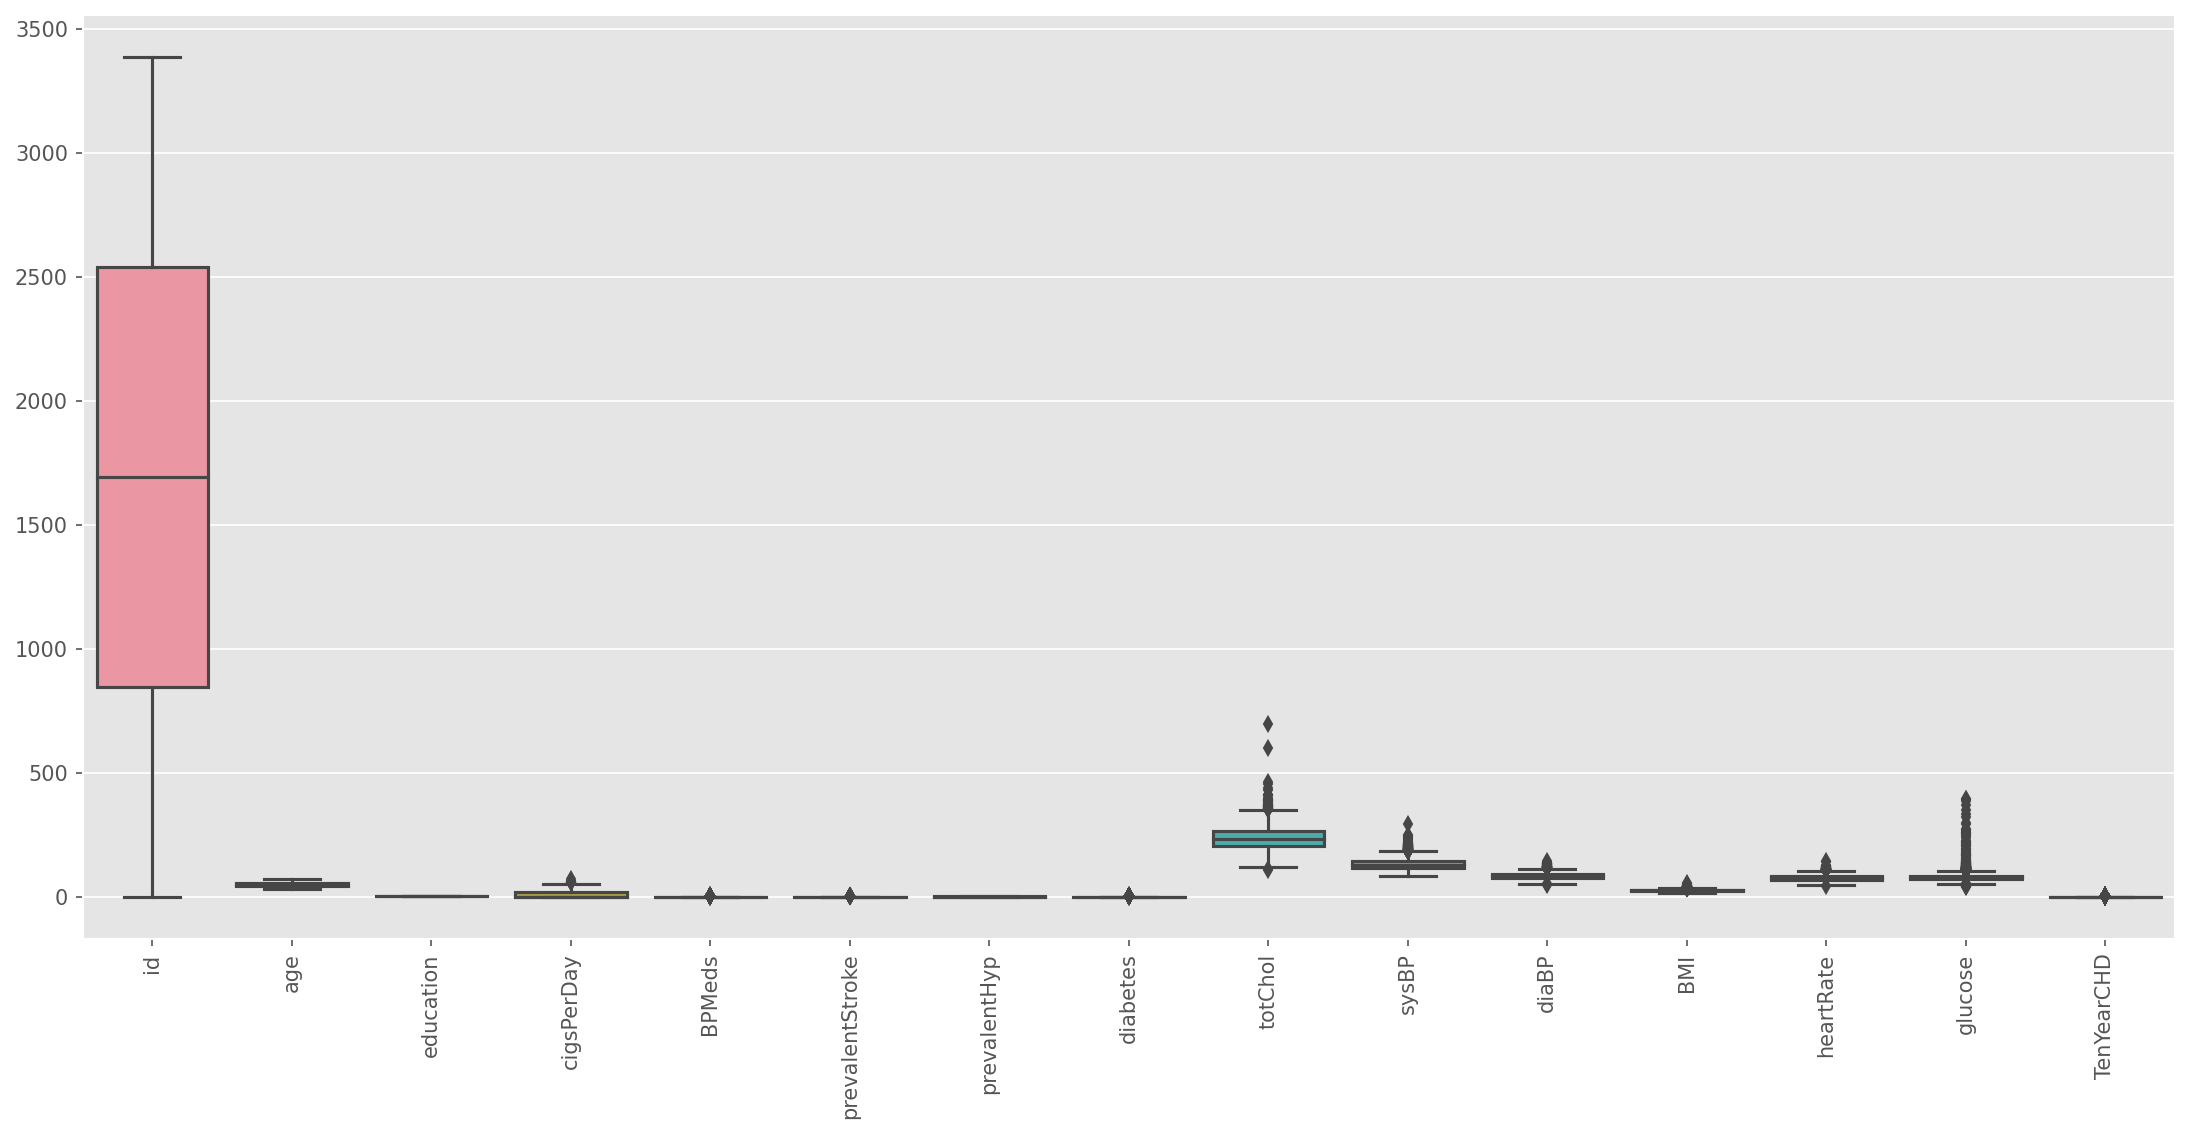

In [42]:
# outliers check
plt.figure(figsize=(18,8),dpi=150)
sns.boxplot(data = df)
plt.xticks(rotation=90)

##### Which statistical test have you done to obtain P-Value?

We have used boxplots for the hypothesis testing, as we are determining the presence of outliers.

##### Why did you choose the specific statistical test?

Boxplots display a 5 number summary of data, this summary is first quartile, mean, third quartile, minimum, maximum, and the values beyond min and max are the outliers. and in the above test we can clearly see that we  have to reject our null hypothesis as our dataset has a lot of outliers.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - Increasing age is an important factor that leads to cardiovascular diseases.
*   Alternative Hypothesis(H1) - Age is not related with cardiovascular risks.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# defining the table
data = [df['age'], df['TenYearCHD']]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value is 1.0
Accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

We have used chi-square test in order to determine whether there is a significant association between the two variables. In our case 'age' and 'TenyearCHD' are the two variables. test shows that age and risk have a significant impact on each other,therefore we failed to reject null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



1.       Null Hypothesis(H0) - mean of total cholestrol = 237

2.   Alternative Hypothesis(H1) - mean of total cholestrol != 237



    


#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['totChol'], x2=None, value=237)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")

0.9589015715213028
failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Z-Test

##### Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed.
Failed to reject null hypothesis as the condition stands true.